# K-means

El algoritmo trabaja iterativamente para asignar a cada “punto” (las filas del conjunto de entrada forman una coordenada) uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). 

Resultados de ejecutar el algoritmo:

+ Los “centroids” de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos que se utilizarán para poder etiquetar nuevas muestras.

+ Etiquetas para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.

Los grupos se van definiendo de manera “orgánica”, es decir, que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez encontrados los centroids se deben analizar para ver cuáles son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

## Dónde usar K-means

El algoritmo de Clustering K-means es uno de los más usados para encontrar grupos ocultos, o sospechados en teoría sobre un conjunto de datos no etiquetado. Esto puede servir para confirmar -o desterrar- alguna teoría que se tenga asumida de los datos. 

También puede ayudar a descubrir relaciones asombrosas entre conjuntos de datos, que de manera manual, no se hubieran reconocido. Una vez que el algoritmo ha ejecutado y obtenido las etiquetas, será fácil clasificar nuevos valores o muestras entre los grupos obtenidos.

### Algunos usos:

+ Segmentación por comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
+ Categorización de productos: agrupar productos por actividad en sus ventas
+ Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal

## Características de las entradas

Las “features” o características que se utilicen como entradas para aplicar el algoritmo k-means deberán ser de valores numéricos, continuos en lo posible. En caso de valores categóricos se puede intentar pasarlo a valor numérico, pero no es recomendable pues no hay una “distancia real”. 

Es recomendable que los valores utilizados estén **normalizados**, manteniendo una misma escala. En algunos casos también funcionan mejor datos porcentuales en vez de absolutos. 

No conviene utilizar features que estén correlacionados o que sean escalares de otros.

## Funcionamiento de K-means

El algoritmo utiliza una proceso iterativo en el que se van ajustando los grupos para producir el resultado final. Para ejecutar el algoritmo se debe pasar como entrada el conjunto de datos y un valor de K. 

El conjunto de datos serán las características o features para cada punto. Las posiciones iniciales de los K centroides serán asignadas de manera aleatoria de cualquier punto del conjunto de datos de entrada. Luego se itera en dos pasos:

### PASO 1- Asignación de datos

Cada “fila” del conjunto de datos se asigna al centroide más cercano basado en la distancia cuadrada Euclideana. Se utiliza la siguiente fórmula (donde dist() es la distancia Euclideana standard):

argmin $dist(c_{i},x)^{2}$ con $c_{i} \in C$

### PASO 2 - Actualización de centroide

Los centroides de cada grupo son recalculados. Esto se hace tomando una media de todos los puntos asignados en el paso anterior.

$c_{i} = \frac{1}{|S_{i}|}\sum_{x_i \in S_i} x_{i}$

El algoritmo itera entre estos pasos hasta cumplir uno de los criterios de detención:

+ Si no hay cambios en los puntos asignados a los grupos,
+ Si la suma de las distancias se minimiza,
+ Se alcanza un número máximo de iteraciones.

## Aplicación del algoritmo

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [105]:
iris = datasets.load_iris()
data_frame_iris=pd.DataFrame(iris['data'])
data_frame_iris

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [106]:
data_frame_iris.columns = iris['feature_names']
data_frame_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


![Flor](Pétalo-sépalo.jpg "Acerca de las flores") 

## Revisión de los grupos que tiene la data

In [107]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

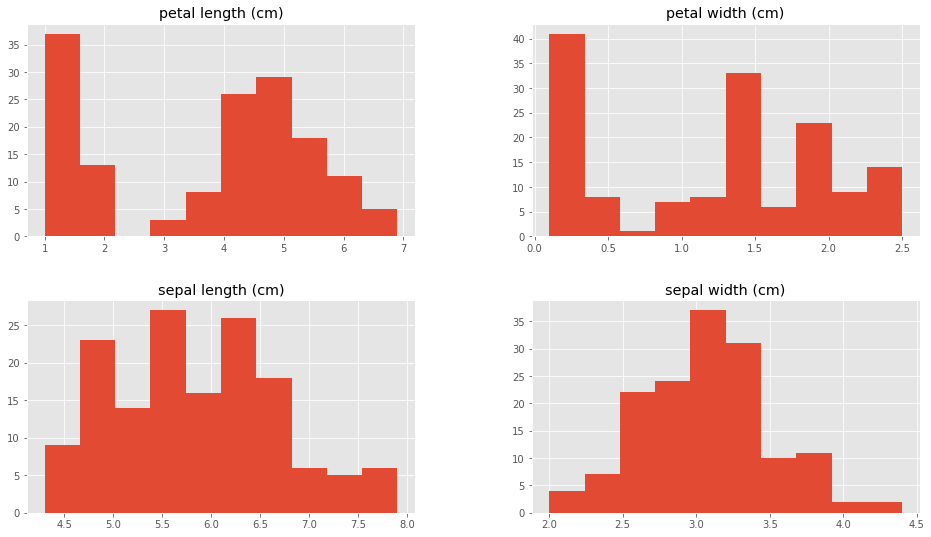

In [108]:
# Revisión de las distribuciones
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
data_frame_iris.hist()
plt.show()

## Ejecución de K-means con un rango de valores para K

In [109]:
distorsion = []
K = range(1,10)
for k in K:
    modelo = KMeans(n_clusters=k)
    modelo.fit(data_frame_iris)
    distorsion.append(modelo.inertia_)

## Gráfica de las distorsiones

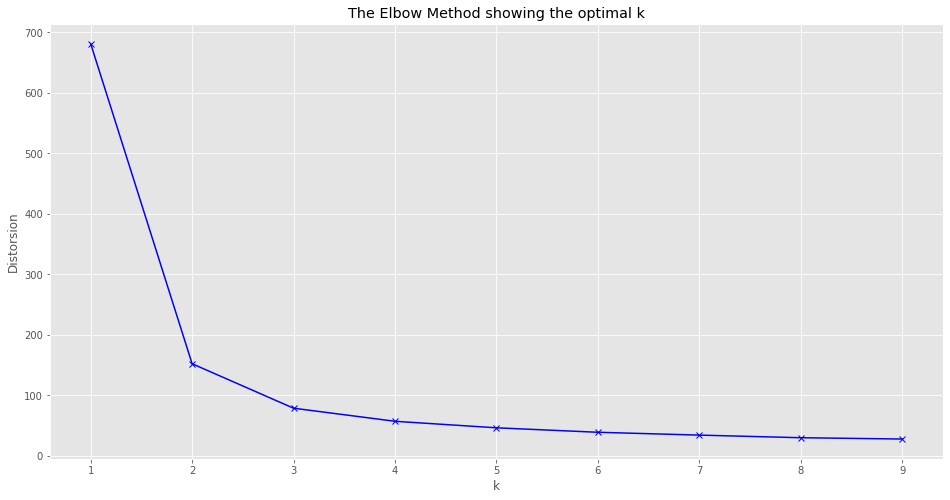

In [110]:
plt.figure(figsize=(16,8))
plt.plot(K, distorsion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

El gráfico anterior representa la curva de Elbow. Se trata de una heurística para determinar el número de conglomerados en un conjunto de datos.

Se puede observar que el valor óptimo es el 3.

Ahora se ejecutará el algoritmo usando K = 3

Text(0.5, 1.0, 'K_Means')

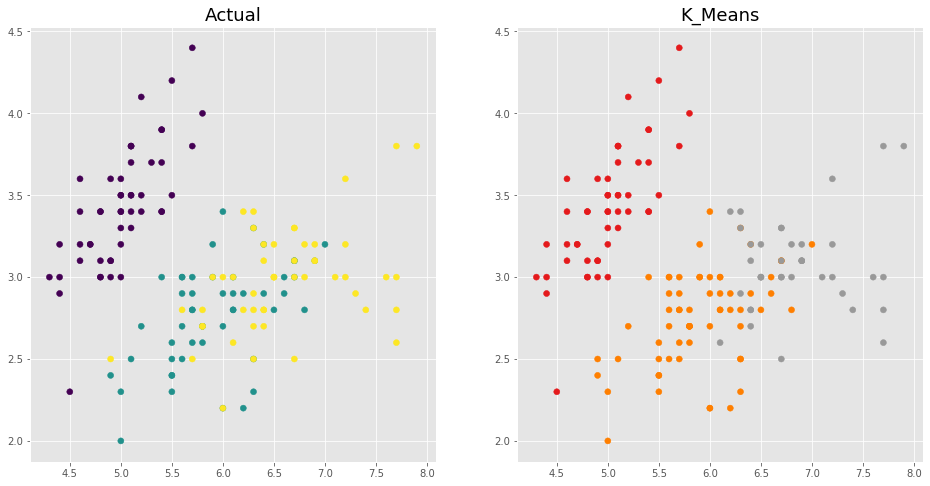

In [111]:
modelo = KMeans(n_clusters=3)
modelo.fit(data_frame_iris)
data_frame_iris['k_means']=modelo.predict(data_frame_iris)
data_frame_iris['target']=iris['target']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(data_frame_iris['sepal length (cm)'], data_frame_iris['sepal width (cm)'], c=data_frame_iris['target'])
axes[1].scatter(data_frame_iris['sepal length (cm)'], data_frame_iris['sepal width (cm)'], c=data_frame_iris['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

Text(0.5, 1.0, 'K_Means')

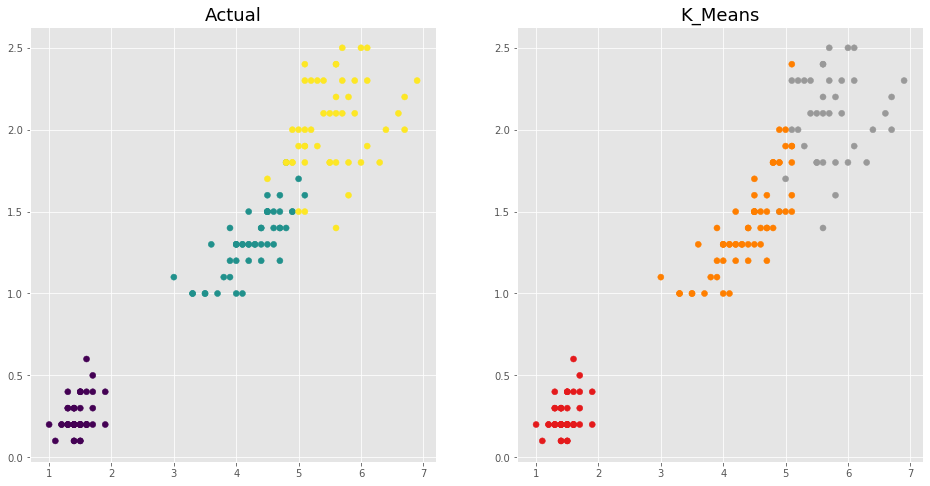

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(data_frame_iris['petal length (cm)'], data_frame_iris['petal width (cm)'], c=data_frame_iris['target'])
axes[1].scatter(data_frame_iris['petal length (cm)'], data_frame_iris['petal width (cm)'], c=data_frame_iris['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

In [125]:
centroids = modelo.cluster_centers_
print(centroids)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [135]:
data_frame_iris.groupby('target').size()

target
0    50
1    50
2    50
dtype: int64

In [136]:
data_frame_iris.groupby('k_means').size()

k_means
0    50
1    62
2    38
dtype: int64

In [137]:
# Se busca el representante del grupo, la flor cercano a su centroide
from sklearn.metrics import pairwise_distances_argmin_min
X = data_frame_iris.drop(columns = ["k_means", "target"])
closest, _ = pairwise_distances_argmin_min(modelo.cluster_centers_, X)
closest

array([  7,  78, 112])

In [115]:
data_frame_iris[7:8]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),k_means,target
7,5.0,3.4,1.5,0.2,0,0


In [116]:
data_frame_iris[78:79]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),k_means,target
78,6.0,2.9,4.5,1.5,1,1


In [117]:
data_frame_iris[112:113]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),k_means,target
112,6.8,3.0,5.5,2.1,2,2


## Consideraciones de K-means

El principal problema son los ***outliers*** ya que alteran (bastante) las media de la distancia. Una posible solución sería aplicar la mediana como medida de proximidad, en ese caso se debe usar la distancia de Manhattan. La otra solución es eliminar los outliers demasiado pequeños y tratarlos como clusters outliers,

Debido a que K-means usa las distancias es necesario normalizar los datos (de esa forma todos constribuyen en la misma medida); de lo contrario, las características con mayores magnitudes tienden a dominar las decisiones del algoritmo.

### Descrubrimiento de outliers

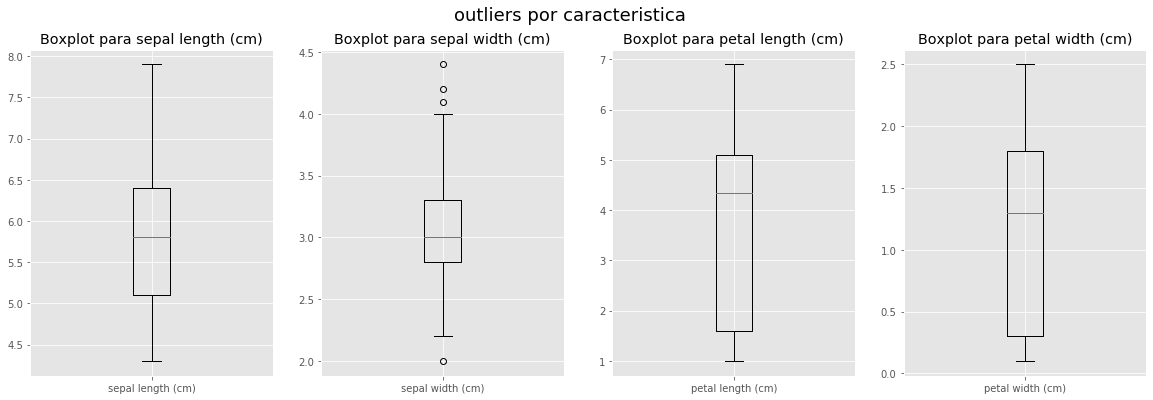

In [131]:
i = 0
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
fig.suptitle('outliers por caracteristica', fontsize=18)
for col in ['sepal length (cm)','sepal width (cm)','petal length (cm)', 'petal width (cm)']:
    ax[i].set_title('Boxplot para ' + col)
    ax[i].boxplot(data_frame_iris[col], labels=[col])  
    i=i+1
plt.show()

In [132]:
# Comprobemos la interpretación
data_frame_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),k_means,target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.920000,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.764304,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,1.750000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000


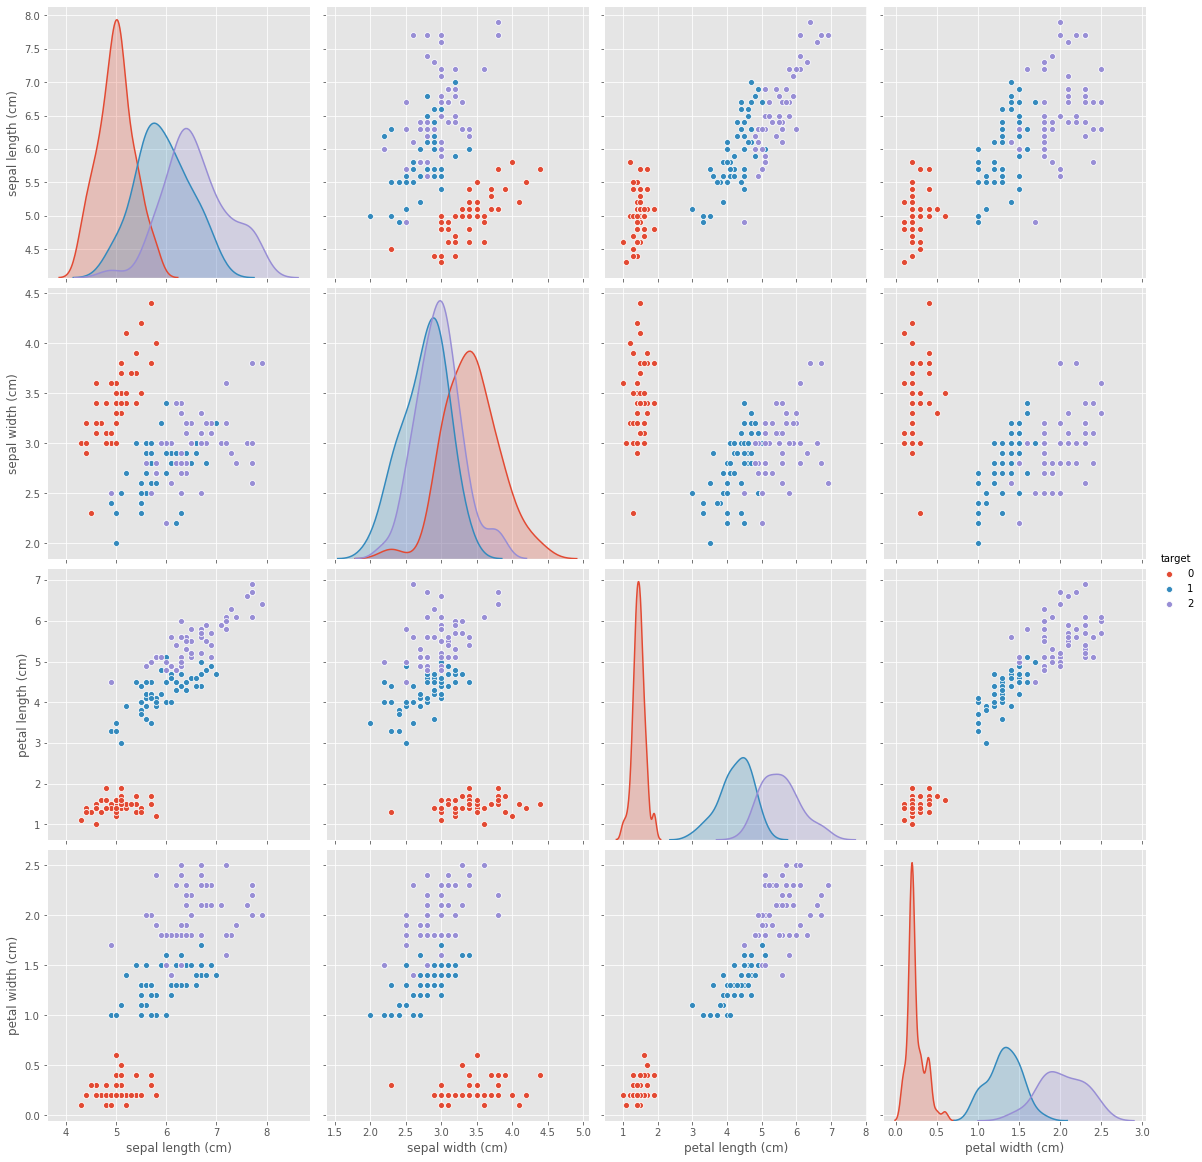

In [134]:
import seaborn as sb
sb.pairplot(data_frame_iris.dropna(), hue='target',height=4,vars=["sepal length (cm)",
                                                                     "sepal width (cm)","petal length (cm)", "petal width (cm)"],kind='scatter')

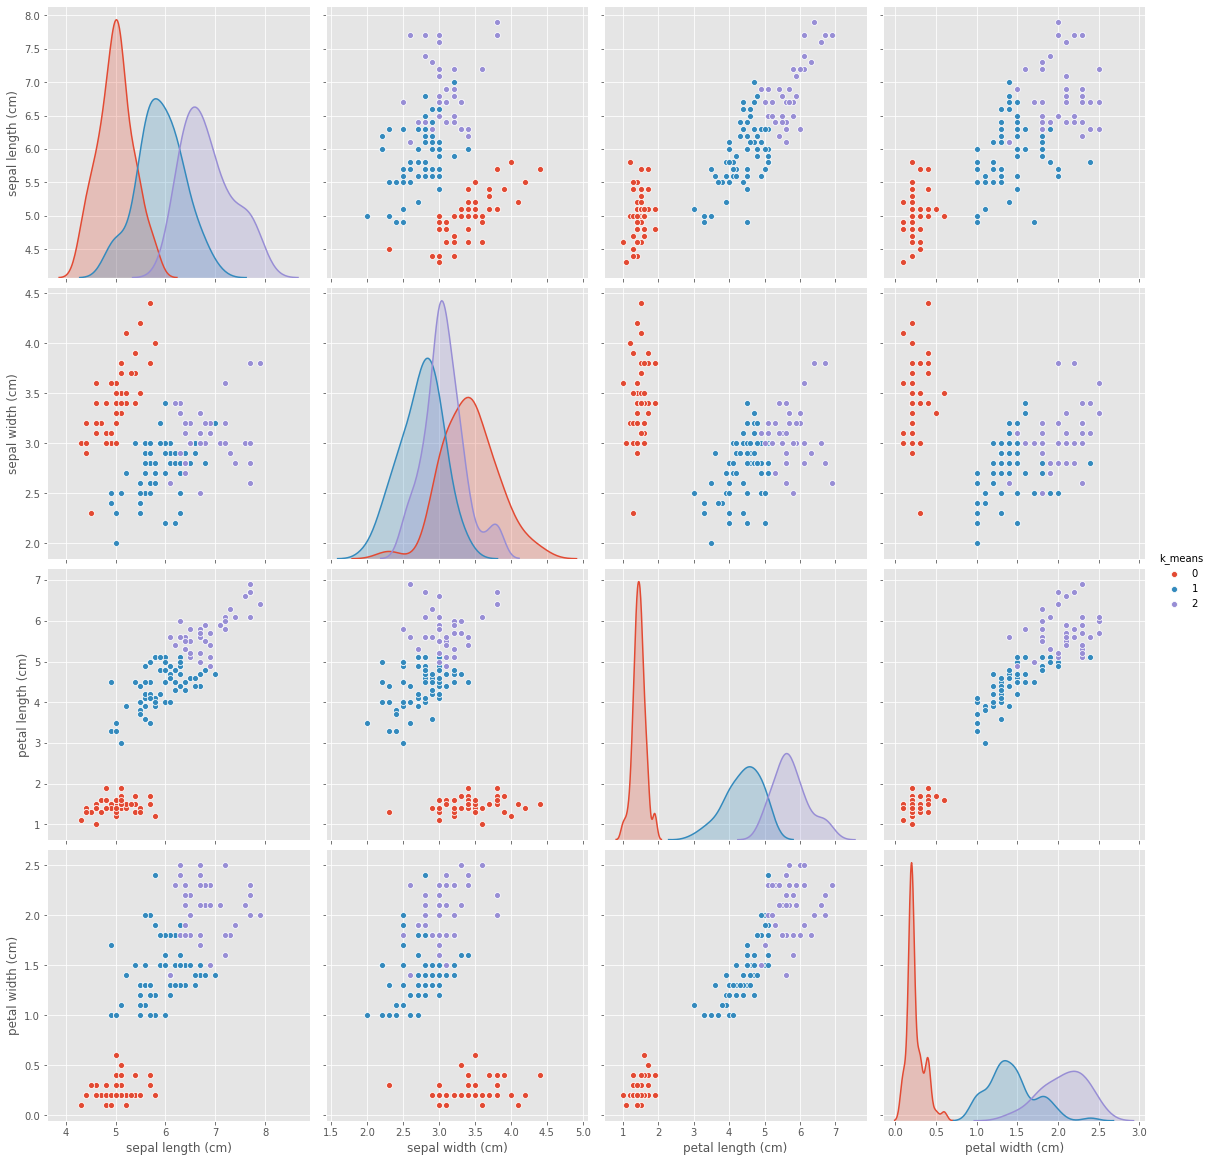

In [138]:
sb.pairplot(data_frame_iris.dropna(), hue='k_means',height=4,vars=["sepal length (cm)",
                                                                     "sepal width (cm)","petal length (cm)", "petal width (cm)"],kind='scatter')